# LINEAR REGRESSION

In [27]:
import numpy as np 
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error

###  Prediction

In [28]:
def Predict(X_train, Y_train, X_test):
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, Y_train)
    return (linear_regression_model, linear_regression_model.predict(X_test))

### Plotting

In [29]:
import math

def calculate_grid(total_plots, max_columns=3):
    """
    Calculate the number of rows and columns for a plot grid.
    
    Parameters:
    total_plots (int): The total number of plots.
    max_columns (int): The maximum number of columns (default is 3).
    
    Returns:
    tuple: A tuple containing the number of rows and columns.
    """
    if max_columns < 1:
        raise ValueError("The number of columns must be at least 1.")
    if max_columns > 3:
        raise ValueError("The number of columns must not exceed 3.")
    
    columns = min(total_plots, max_columns)
    rows = math.ceil(total_plots / columns)
    
    return rows, columns



In [30]:
def Plot_Scatter(x_data, y_data, predictions = None, title = None, ymax = None, errors = None, figsize=(12,4), max_columns = 3):
    
    
    num_rows, num_columns = calculate_grid(len(y_data), max_columns)
    print(f'DATA={len(y_data)}')
    fig, axs = plt.subplots(num_rows, num_columns, figsize=figsize)    

    for yn, ax in zip(y_data, fig.axes):
        ax.set_title(yn)
        ax.set_xlabel('x')
        ax.set_ylabel(yn)        
        ax.scatter(x_data, y_data[yn], s=2)
        
        if predictions is not None:
            ax.plot(x_data, predictions[yn], color='red', linewidth=1.5)
        
        if errors is not None:
            ax.plot(x_data, predictions[yn] + errors[yn], color='green', linewidth = 1, linestyle='dotted')
            ax.plot(x_data, predictions[yn] - errors[yn], color='green', linewidth = 1, linestyle='dotted')
            
        ax.set_ylim([0, ymax])
        
    if title is not None:
        fig.suptitle(title) 

## Load Data

In [31]:
df = pd.read_csv('../src/data/metric_test_data.csv')

In [32]:
display(df.head())

,x,y1,y2
0,1008.28,1137.88,2125.15
1,1018.04,1204.44,1321.04
2,1026.24,1295.66,907.97
3,1039.61,1242.54,786.18
4,1047.88,1195.06,1430.43


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y1      1000 non-null   float64
 2   y2      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [34]:
(size, Ncolumns) = df.shape
print(f'The data consists of {size} entries, with {Ncolumns} columns.')

The data consists of 1000 entries, with 3 columns.


## Visualise Data

DATA=2


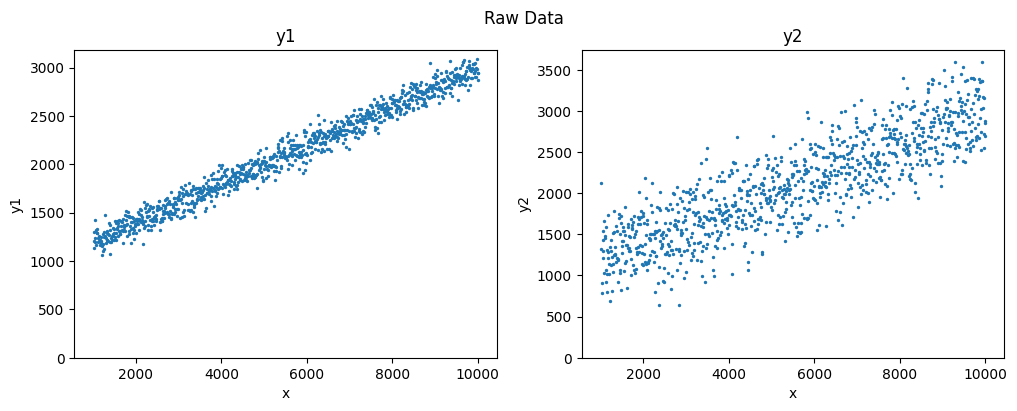

In [35]:
x = np.array(df['x'])
y1 = np.array(df['y1'])
y2 = np.array(df['y2'])
y = {'y1': y1, 'y2': y2}

Plot_Scatter(x, y, title = 'Raw Data')

## Split Data

In [36]:
train, test = train_test_split(df, test_size=0.2)

x_train  = np.array(train['x']).reshape(-1,1)
x_test   = np.array(test['x']).reshape(-1,1)

y1_train = np.array(train['y1']).reshape(-1,1)
y2_train = np.array(train['y2']).reshape(-1,1)

y1_test = np.array(test['y1']).reshape(-1,1)
y2_test = np.array(test['y2']).reshape(-1,1)

y_train = {'y1': y1_train, 'y2': y2_train}
y_test  = {'y1': y1_test,  'y2': y2_test}

## Training Data

In [37]:
y1_model, y1_train_pred = Predict(x_train, y1_train, x_train)
y2_model, y2_train_pred = Predict(x_train, y2_train, x_train)

y_train_pred  = {'y1': y1_train_pred,  'y2': y2_train_pred}

In [38]:
y1_test_pred = y1_model.predict(x_test)
y2_test_pred = y2_model.predict(x_test)

y_test_pred  = {'y1': y1_test_pred,  'y2': y2_test_pred}

### Plotting the Training Model

DATA=2


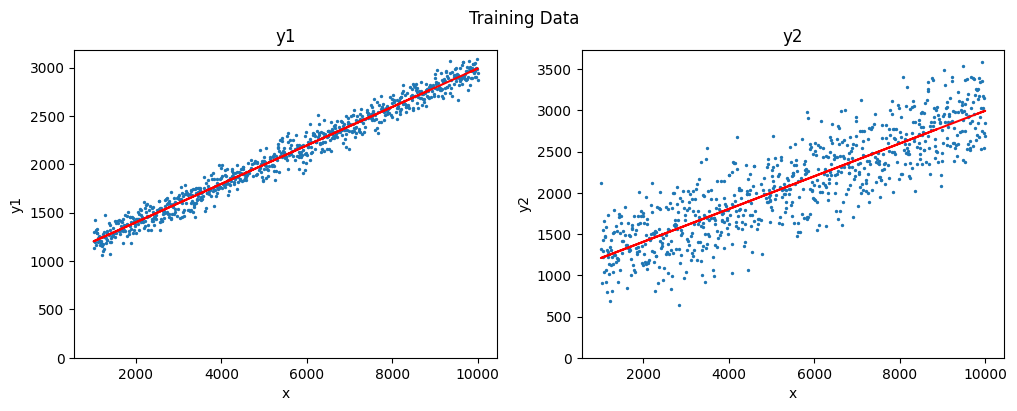

In [39]:
Plot_Scatter(x_train, y_train, y_train_pred, title = 'Training Data')

### Comparing Models

In [40]:
print(f'The slopes are: y1: {np.round(y1_model.coef_[0][0],4)} y2: {np.round(y2_model.coef_[0][0],4)}')
print(f'The y-intercepts are: y1: {np.round(y1_model.intercept_[0],1)} y2: {np.round(y2_model.intercept_[0],1)}')

The slopes are: y1: 0.1988 y2: 0.1987
The y-intercepts are: y1: 1002.7 y2: 1009.0


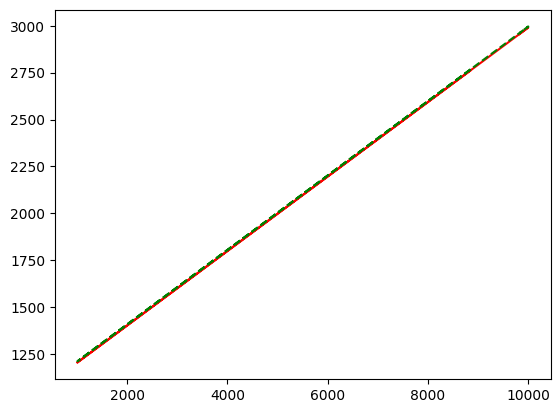

In [41]:
plt.plot(x_train, y_train_pred["y1"], color='red')
plt.plot(x_train, y_train_pred["y2"], color='green', linestyle='dashed')

### Calculating the Metrics

In [43]:
train_mae =  {'y1': np.round(mean_absolute_error(y1_train, y1_train_pred),2), 
              'y2': np.round(mean_absolute_error(y2_train, y2_train_pred),2)
              }

train_mse =  {'y1': np.round(mean_squared_error(y1_train, y1_train_pred),2), 
              'y2': np.round(mean_squared_error(y2_train, y2_train_pred),2)
              }

train_rmse = {'y1': np.round(np.sqrt(train_mse['y1']),2), 
              'y2': np.round(np.sqrt(train_mse['y2']),2)
              }

print('COMPARISON OF METRICS')
print(f'Training MAE   : {train_mae}')
print(f'Training MSE   : {train_mse}')
print(f'Training RMSE  : {train_rmse}')

COMPARISON OF METRICS
Training MAE   : {'y1': np.float64(65.14), 'y2': np.float64(246.74)}
Training MSE   : {'y1': np.float64(6765.37), 'y2': np.float64(94493.59)}
Training RMSE  : {'y1': np.float64(82.25), 'y2': np.float64(307.4)}


DATA=2


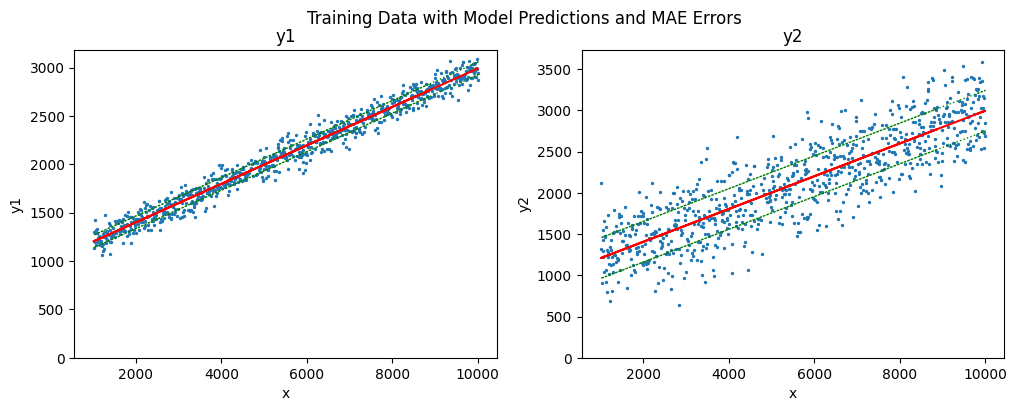

In [44]:
Plot_Scatter(x_train, y_train, y_train_pred,  errors = train_mae, title = 'Training Data with Model Predictions and MAE Errors')

## Evaluate Test Model

In [45]:
test_mae =  {'y1': np.round(mean_absolute_error(y1_test, y1_test_pred), 2), 
             'y2': np.round(mean_absolute_error(y2_test, y2_test_pred), 2)
            }

test_mse =  {'y1': np.round(mean_squared_error(y1_test, y1_test_pred), 2), 
             'y2': np.round(mean_squared_error(y2_test, y2_test_pred), 2)
            }

test_rmse = {'y1': np.round(np.sqrt(test_mse['y1']), 2), 
             'y2': np.round(np.sqrt(test_mse['y2']), 2)
            }

print('COMPARISON OF METRICS')
print(f'Test Data MAE : {test_mae}')
print(f'Test Data MSE : {test_mse}')
print(f'Test Data RMSE: {test_rmse}')

COMPARISON OF METRICS
Test Data MAE : {'y1': np.float64(65.96), 'y2': np.float64(242.18)}
Test Data MSE : {'y1': np.float64(6537.77), 'y2': np.float64(92732.0)}
Test Data RMSE: {'y1': np.float64(80.86), 'y2': np.float64(304.52)}


DATA=2


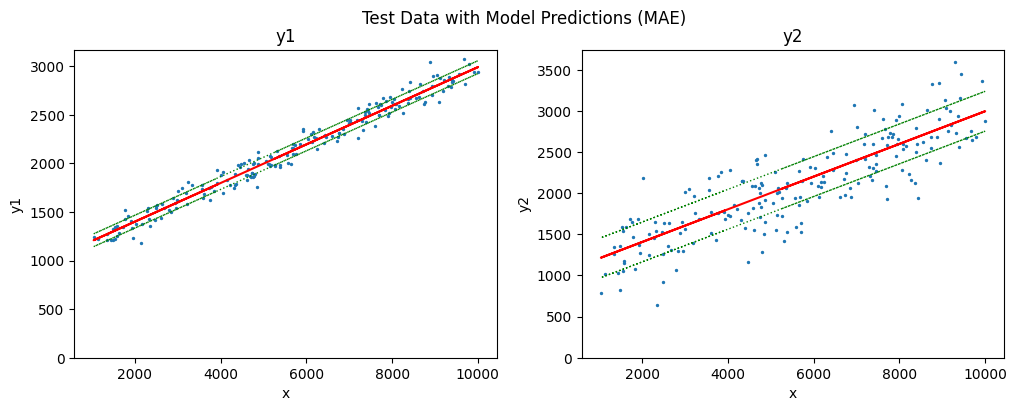

In [46]:
Plot_Scatter(x_test, y_test, y_test_pred, errors = test_mae,  title = 'Test Data with Model Predictions (MAE)')

## Tabulated Comparion

In [47]:
cases = ['Train', 'Test']
metrics = ['Mean Absolute Error','Mean Square Error','Root Mean Square Error']

index = pd.MultiIndex.from_tuples([(m, c) for c in cases for m in metrics])
data = [train_mae, train_mse, train_rmse, test_mae, test_mse, test_rmse]

df_metrics = (pd.DataFrame(data=data, index=index)
              .sort_index()
              .assign(Ratio  = lambda df_: np.round(df_["y2"]/df_["y1"],1))
             )

display(df_metrics)

y1        y2  Ratio
Mean Absolute Error    Test     65.96    242.18    3.7
                       Train    65.14    246.74    3.8
Mean Square Error      Test   6537.77  92732.00   14.2
                       Train  6765.37  94493.59   14.0
Root Mean Square Error Test     80.86    304.52    3.8
                       Train    82.25    307.40    3.7